<a href="https://colab.research.google.com/github/HenryThrop/IE_CDT_ClimateDynamicsTutorial/blob/main/PredictSpatialPatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate dynamics:
## Predicting the weather: spatial patterns approach
In this part of the climate dynamics tutorial, we will use climate model output to estimate the spatial patterns of climate change.  
First, import everything we need.

In [1]:
!pip install cartopy
!pip install cftime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import glob
from scipy.constants import convert_temperature

In [3]:
!git clone https://github.com/peterukk/IE_CDT_ClimateDynamicsTutorial

Cloning into 'IE_CDT_ClimateDynamicsTutorial'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 67 (delta 25), reused 9 (delta 2), pack-reused 13 (from 1)
Receiving objects: 100% (67/67), 95.31 MiB | 30.14 MiB/s, done.
Resolving deltas: 100% (26/26), done.


Predicting long-term climate change requires using climate model scenarios. We will use two equilibrium climate simulations and interpolate between the two: a 4xCO2 scenario and a pre-industrial scenario. Open the data.

In [4]:
data_path = "IE_CDT_ClimateDynamicsTutorial/data/"
filename_PI = data_path + "tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_196001-204912.nc"
ds_PI = xr.open_dataset(filename_PI)
ds_PI

<xarray.Dataset> Size: 119MB
Dimensions:    (time: 1080, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 9kB 1960-01-16 00:00:00 ... 2049-12-16 00:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 17kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 119MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   39600.0
    branch_time_in_parent:  39600.0
    creation_date:          2019-04-05T15:19:17Z
    ...                     ...
    title:                  UKESM1-0-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/7c0131d5-0189-4856-94a7-a305e139602a

In [5]:
filename_4xCO2 = data_path + "tas_Amon_UKESM1-0-LL_abrupt-4xCO2_r1i1p1f2_gn_195001-199912.nc"
ds_4xCO2 = xr.open_dataset(filename_4xCO2)
ds_4xCO2

<xarray.Dataset> Size: 66MB
Dimensions:    (time: 600, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 5kB 1950-01-16 00:00:00 ... 1999-12-16 00:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 10kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 66MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  39600.0
    creation_date:          2019-04-05T15:14:37Z
    ...                     ...
    title:                  UKESM1-0-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/07719010-69f1-4046-b04f-05ddaf0d1ee8

Take the average of time and have a look at the differences between the two simulations.

In [6]:
# Average over time and get just pattern
surface_temp_PI = ds_PI["tas"].mean(dim="time")
surface_temp_4xCO2 = ds_4xCO2["tas"].mean(dim="time")
surface_temp_4xCO2

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[235.67888, 235.68628, 235.69281, ..., 235.68016, 235.67935,
        235.68208],
       [236.88333, 236.7978 , 236.71388, ..., 237.16812, 237.06956,
        236.97417],
       [237.85487, 237.70416, 237.56068, ..., 238.37529, 238.19182,
        238.0154 ],
       ...,
       [278.41388, 278.43405, 278.45358, ..., 278.3423 , 278.3649 ,
        278.39154],
       [278.09793, 278.10257, 278.1067 , ..., 278.0746 , 278.0848 ,
        278.09244],
       [277.6439 , 277.64462, 277.64532, ..., 277.64075, 277.6418 ,
        277.64273]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


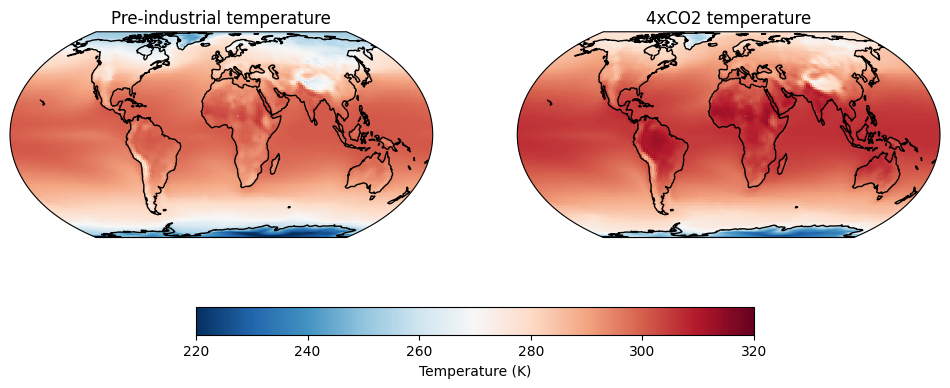

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw={'projection': ccrs.EqualEarth(central_longitude=0)})

axs[0].coastlines()
colormap_PI = axs[0].pcolormesh(surface_temp_PI.lon,
                                surface_temp_PI.lat,
                                surface_temp_PI,
                                vmin=220, vmax=320,
                                cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[0].set_title("Pre-industrial temperature")

axs[1].coastlines()
plt.sca(axs[1])
colormap_4xCO2 = axs[1].pcolormesh(surface_temp_4xCO2.lon,
                                   surface_temp_4xCO2.lat,
                                   surface_temp_4xCO2,
                                   vmin=220, vmax=320,
                                   cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[1].set_title("4xCO2 temperature")

plt.colorbar(colormap_PI, ax=axs,
             location="bottom",
             orientation="horizontal",
             shrink=0.6,
             label="Temperature (K)")


## Pattern scaling
A simple approach to interpolate between these two climates at the year 2100 is called "Pattern Scaling" (Santer, 1990, Mitchell, 2003). This has been used for many years and still holds up fairly well. It assumes that the global warming pattern remains constant and is scaled by a scaler variable, such as global mean temperature. Then, we can estimate the global warming changes as
$$P(x,y) =  \frac{\Delta T}{\Delta T_{ref}} P_{ref}(x,y) $$
where $P_{ref}(x,y)$ is a reference global warming pattern, $\Delta T_{ref}$ is the global mean temperature change in the reference scenario and $\Delta T$ is the global mean temperature change in the new scenario. Note that we have to estimate the latter from somewhere, such as the IPCC report, an energy balance model, a climate model emulator. We will assume that in 2100 the global mean temperature change relative to pre-industrial is ~3K [IPCC, 2021].
1. Take temperature difference between two scenarios to get $P_{ref}$
2. Normalise pattern by global mean temperature change - this gives the pattern of warming per 1K of warming $ \frac{P_{ref}(x,y)}{\Delta T_{ref}} $. The normalized pattern should be centered around 1. Hint: Don't forget to take an area weighted mean to account for different grid cell sizes, otherwise there will be larger contributions from higher latitudes. [This is quite easy to do with xarray](https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html)


In [17]:
surface_temp_PI
surface_temp_4xCO2

surface_temp_pattern = surface_temp_4xCO2 - surface_temp_PI

import xarray as xr
import numpy as np

# assume surface_temp_pattern is an xarray.DataArray with dims ('lat','lon')
# and coordinates surface_temp_pattern['lat'], surface_temp_pattern['lon']

# 1) build 1D cos(lat) weights and then a 2D DataArray weights_da
lat = surface_temp_pattern['lat']
lon = surface_temp_pattern['lon']

weights_1d = np.cos(np.deg2rad(lat))            # xarray will broadcast this automatically
weights_da = xr.DataArray(weights_1d, coords={'lat': lat}, dims=['lat'])

# If you prefer an explicit 2D weights field:
# weights_da_2d = xr.DataArray(np.cos(np.deg2rad(lat.values))[:, None] * np.ones(len(lon)),
#                              coords={'lat': lat, 'lon': lon}, dims=['lat','lon'])

# 2) compute the area-weighted mean (xarray knows how to broadcast weights over lon)
weighted_mean = surface_temp_pattern.weighted(weights_da).mean(dim=('lat','lon'))
print("weighted_mean (xarray):", float(weighted_mean))

# 3) normalize the pattern so area-weighted mean == 1
surface_temp_pattern_norm = surface_temp_pattern / weighted_mean

# confirm
check = surface_temp_pattern_norm.weighted(weights_da).mean(dim=('lat','lon'))
print("weighted mean after normalization:", float(check))   # should be ~1.0


weighted_mean (xarray): 7.556553073225369
weighted mean after normalization: 1.0000000000000002


Plot the normalised warming pattern. Which regions are projected to experience larger relative warming?

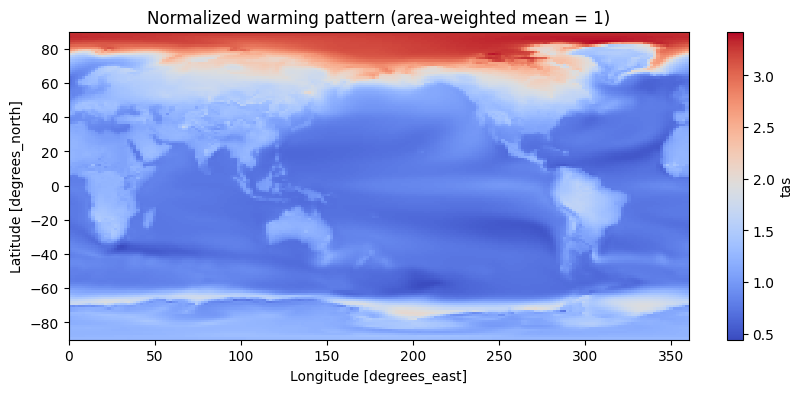

In [22]:
import matplotlib.pyplot as plt

# surface_temp_pattern_norm is an xarray.DataArray (lat, lon) whose area-weighted mean == 1
fig, ax = plt.subplots(figsize=(10,4))
im = surface_temp_pattern_norm.plot.pcolormesh(
    ax=ax,
    cmap='coolwarm',    # change if you prefer
    add_colorbar=True,
    rasterized=True
)
ax.set_title('Normalized warming pattern (area-weighted mean = 1)')
ax.coastlines = None  # safe in case cartopy not installed (no-op)
plt.show()

3. Scale the pattern by the new global mean temperature change. Add the scaled temperature changes (which assumed ~3K global warming) to the preindustrial temperatures. What's the projected temperature for Oxford in 2100?

In [25]:
import xarray as xr
import numpy as np

# ---------------------------
# Parameters / inputs
# ---------------------------
target_deltaT = 3.0  # K of global warming to scale to (e.g. IPCC ~3 K)
# Coordinates for Oxford:
ox_lat = 51.7520
ox_lon = -1.2577   # degrees East if negative -> West

# Your data (must exist in your session)
# surface_temp_pattern_norm : xarray.DataArray(lat,lon)  # normalized pattern per 1K (area-weighted mean == 1)
# preindustrial_temp         : xarray.DataArray(lat,lon)  # preindustrial absolute temperatures (°C or K)

# ---------------------------
# 1) Scale pattern to target warming (K)
# ---------------------------
# Pref is per 1K; scaling by target_deltaT yields K change
pattern_scaled = surface_temp_pattern_norm * target_deltaT
pattern_scaled.name = 'pattern_scaled'  # optional

# ---------------------------
# 2) Add scaled changes to preindustrial temperatures
# ---------------------------
# If preindustrial_temp has a time dim (e.g., mean map saved as DataArray with no time), adapt accordingly.
projected_2100 = surface_temp_PI + pattern_scaled
projected_2100.name = 'projected_2100'

# ---------------------------
# 3) Ensure longitude conventions match and convert lon if needed
# ---------------------------
# Many datasets use 0..360 while ox_lon is -180..180. Convert input lon to dataset convention if required.
def lon_to_dataset(lon_value, da):
    lon_coord = da['lon']
    # if dataset uses 0..360 and lon_value is negative, convert:
    if lon_coord.max() > 180 and lon_value < 0:
        return lon_value % 360
    # if dataset uses -180..180 and lon_value > 180, convert:
    if lon_coord.max() <= 180 and lon_value > 180:
        return ((lon_value + 180) % 360) - 180
    return lon_value

ox_lon_data = lon_to_dataset(ox_lon, projected_2100)

# ---------------------------
# 4) Extract Oxford value (nearest grid cell)
# ---------------------------
proj_ox_nearest = projected_2100.sel(lat=ox_lat, lon=ox_lon_data, method='nearest')

# ---------------------------
# 5) (Optional) Interpolated value (bilinear)
# ---------------------------
try:
    proj_ox_interp = projected_2100.interp(lat=ox_lat, lon=ox_lon_data)
except Exception:
    proj_ox_interp = None

# ---------------------------
# 6) Print the results
# ---------------------------
print("Target global warming (ΔT):", target_deltaT, "K")
print("Oxford coordinates used: lat =", ox_lat, " lon =", ox_lon_data)

# nearest-grid value
val_nearest = float(proj_ox_nearest.values)
print(f"Projected temperature for Oxford in 2100 (nearest grid cell): {val_nearest:.3f} (units same as preindustrial_temp)")

# interpolated value (if available)
if proj_ox_interp is not None:
    val_interp = float(proj_ox_interp.values)
    print(f"Projected temperature for Oxford in 2100 (interpolated): {val_interp:.3f} (units same as preindustrial_temp)")
else:
    print("Interpolation not available (dataset may not support .interp on these coords).")




Target global warming (ΔT): 3.0 K
Oxford coordinates used: lat = 51.752  lon = 358.7423
Projected temperature for Oxford in 2100 (nearest grid cell): 285.376 (units same as preindustrial_temp)
Projected temperature for Oxford in 2100 (interpolated): 285.447 (units same as preindustrial_temp)


In [27]:
import xarray as xr
import numpy as np

# ---------- inputs (adjust if needed) ----------
target_deltaT = 3.0
ox_lat = 51.7520
ox_lon = -1.2577   # -1.2577 = 1.2577°W

# Assume these exist:
# surface_temp_pattern_norm : xarray.DataArray(lat,lon)  # K per K
# preindustrial_temp         : xarray.DataArray(lat,lon)  # absolute temp (°C or K)

# ---------- helper to adapt lon convention ----------
def lon_to_dataset(lon_value, da):
    lon_coord = da['lon']
    if lon_coord.max() > 180 and lon_value < 0:
        return lon_value % 360
    if lon_coord.max() <= 180 and lon_value > 180:
        return ((lon_value + 180) % 360) - 180
    return lon_value

ox_lon_data = lon_to_dataset(ox_lon, surface_temp_PI)

# ---------- scale pattern and build projected field ----------
pattern_scaled = surface_temp_pattern_norm * target_deltaT
projected_2100 = surface_temp_PI + pattern_scaled

# ---------- extract Oxford value: nearest grid cell ----------
proj_ox_nearest = projected_2100.sel(lat=ox_lat, lon=ox_lon_data, method='nearest')
pi_ox_nearest   = surface_temp_PI.sel(lat=ox_lat, lon=ox_lon_data, method='nearest')

# ---------- extract Oxford value: interpolated (bilinear) ----------
# .interp will perform linear interpolation if coords are numeric
try:
    proj_ox_interp = projected_2100.interp(lat=ox_lat, lon=ox_lon_data)
    pi_ox_interp   = surface_temp_PI.interp(lat=ox_lat, lon=ox_lon_data)
except Exception:
    proj_ox_interp = None
    pi_ox_interp = None

# ---------- compute differences ----------
# nearest
delta_nearest = proj_ox_nearest - pi_ox_nearest
# interpolated (if available)
delta_interp = (proj_ox_interp - pi_ox_interp) if proj_ox_interp is not None else None

# ---------- print results ----------
print("Oxford coords used: lat =", ox_lat, " lon =", ox_lon_data)
print("Target global warming (ΔT):", target_deltaT, "K\n")

# nearest-grid results
val_proj_near = float(proj_ox_nearest.values)
val_pi_near   = float(pi_ox_nearest.values)
val_delta_near = float(delta_nearest.values)
print("Nearest-grid cell:")
print(f"  Pre-industrial = {val_pi_near:.3f} (units as preindustrial_temp)")
print(f"  Projected 2100 = {val_proj_near:.3f}")
print(f"  Difference (2100 - preindustrial) = {val_delta_near:.3f} (K or °C)\n")

# interpolated results (if available)
if delta_interp is not None:
    val_proj_int = float(proj_ox_interp.values)
    val_pi_int   = float(pi_ox_interp.values)
    val_delta_int= float(delta_interp.values)
    print("Interpolated (bilinear):")
    print(f"  Pre-industrial = {val_pi_int:.3f}")
    print(f"  Projected 2100 = {val_proj_int:.3f}")
    print(f"  Difference (2100 - preindustrial) = {val_delta_int:.3f} (K or °C)\n")
else:
    print("Interpolation not available for this dataset (fell back to nearest-grid only).\n")

# ---------- optional: difference map and quick check ----------
diff_map = projected_2100 - surface_temp_PI
# e.g., show area-weighted mean of diff_map (should be approximately target_deltaT)
weights_da = xr.DataArray(np.cos(np.deg2rad(diff_map['lat'])), coords={'lat': diff_map['lat']}, dims=['lat'])
global_mean_diff = float(diff_map.weighted(weights_da).mean(dim=('lat','lon')))
print(f"Area-weighted global mean of the difference map: {global_mean_diff:.3f} K (target was {target_deltaT} K)")

Oxford coords used: lat = 51.752  lon = 358.7423
Target global warming (ΔT): 3.0 K

Nearest-grid cell:
  Pre-industrial = 282.424 (units as preindustrial_temp)
  Projected 2100 = 285.376
  Difference (2100 - preindustrial) = 2.952 (K or °C)

Interpolated (bilinear):
  Pre-industrial = 282.514
  Projected 2100 = 285.447
  Difference (2100 - preindustrial) = 2.933 (K or °C)

Area-weighted global mean of the difference map: 3.000 K (target was 3.0 K)


## Compare pattern of projected changes to observed changes so far
How does the pattern of surface temperature changes predicted by the UKESM1 climate model compare to observed changes between 1950 and 2025?

You can compare the projected warming pattern to trend in ERA5 reanalysis data, which was already downloaded: ERA5_t2m_monthly_1950-2025_global_lfs.nc. The file is more than 1GB due to ERA5 having much higher spatial resolution than the climate model. Use the first and last 30 year periods to compute a baseline and present-day observed climate. The time scales are different to the climate model projections, but again we can look at normalised patterns to compare the two.

In [28]:
filename_ERA5 = data_path + "ERA5_t2m_monthly_1950-2025_global_lfs.nc"
ds_ERA5 = xr.open_dataset(filename_ERA5)
ds_ERA5


<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 911, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 7kB 1949-12-01 ... 2025-10-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 15kB ...
    number      int64 8B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 Sun Nov  9 19:39:38 2025: ncks -v t2m -d valid_t...
    NCO:                     netCDF Operators version 5.2.1 (Homepage = http:...

In [30]:
surface_temp_ERA5 = ds_ERA5["t2m"]
# Extract the first and last 30 years as separate DataArrays, and take the temporal mean of both
surface_temp_ERA5_1 = surface_temp_ERA5.sel(valid_time=slice("1950-01-01", "1980-01-01")).mean(dim="valid_time")
surface_temp_ERA5_2 = surface_temp_ERA5.sel(valid_time=slice("1995-10-01", "2025-10-01")).mean(dim="valid_time")
surface_temp_ERA5_2

<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)> Size: 4MB
array([[259.80756, 259.80756, 259.80756, ..., 259.80756, 259.80756,
        259.80756],
       [259.7858 , 259.78613, 259.7864 , ..., 259.785  , 259.78534,
        259.78552],
       [259.81573, 259.8164 , 259.81702, ..., 259.8139 , 259.8143 ,
        259.8151 ],
       ...,
       [228.19241, 228.19315, 228.19455, ..., 228.19041, 228.1917 ,
        228.1923 ],
       [228.10344, 228.10457, 228.10565, ..., 228.10165, 228.10219,
        228.1029 ],
       [227.6521 , 227.6521 , 227.6521 , ..., 227.6521 , 227.6521 ,
        227.6521 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number     int64 8B ...

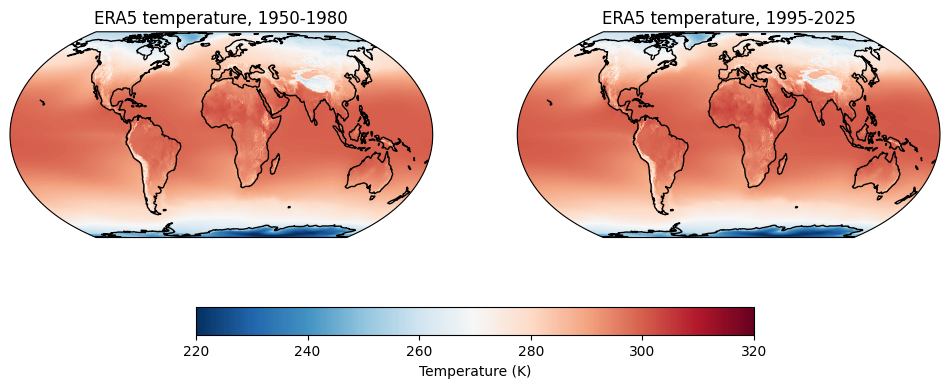

In [31]:
# Plot the first and last 30 years surface temperature in ERA5. This will take about a minute as the data has a relatively high resolution!
fig, axs = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw={'projection': ccrs.EqualEarth(central_longitude=0)})

axs[0].coastlines()
colormap_beg = axs[0].pcolormesh(surface_temp_ERA5_1.longitude,
                                surface_temp_ERA5_1.latitude,
                                surface_temp_ERA5_1,
                                vmin=220, vmax=320,
                                cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[0].set_title("ERA5 temperature, 1950-1980")

axs[1].coastlines()
plt.sca(axs[1])
colormap_end = axs[1].pcolormesh(surface_temp_ERA5_2.longitude,
                                   surface_temp_ERA5_2.latitude,
                                   surface_temp_ERA5_2,
                                   vmin=220, vmax=320,
                                   cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[1].set_title("ERA5 temperature, 1995-2025")

plt.colorbar(colormap_beg, ax=axs,
             location="bottom",
             orientation="horizontal",
             shrink=0.6,
             label="Temperature (K)")

Using lat coord: latitude  lon coord: longitude
Area-weighted global mean change (ΔT_ref): 0.773100 K
Area-weighted mean of Pref (should be ~1): 1.000000
Area-weighted std of Pref: 0.744345


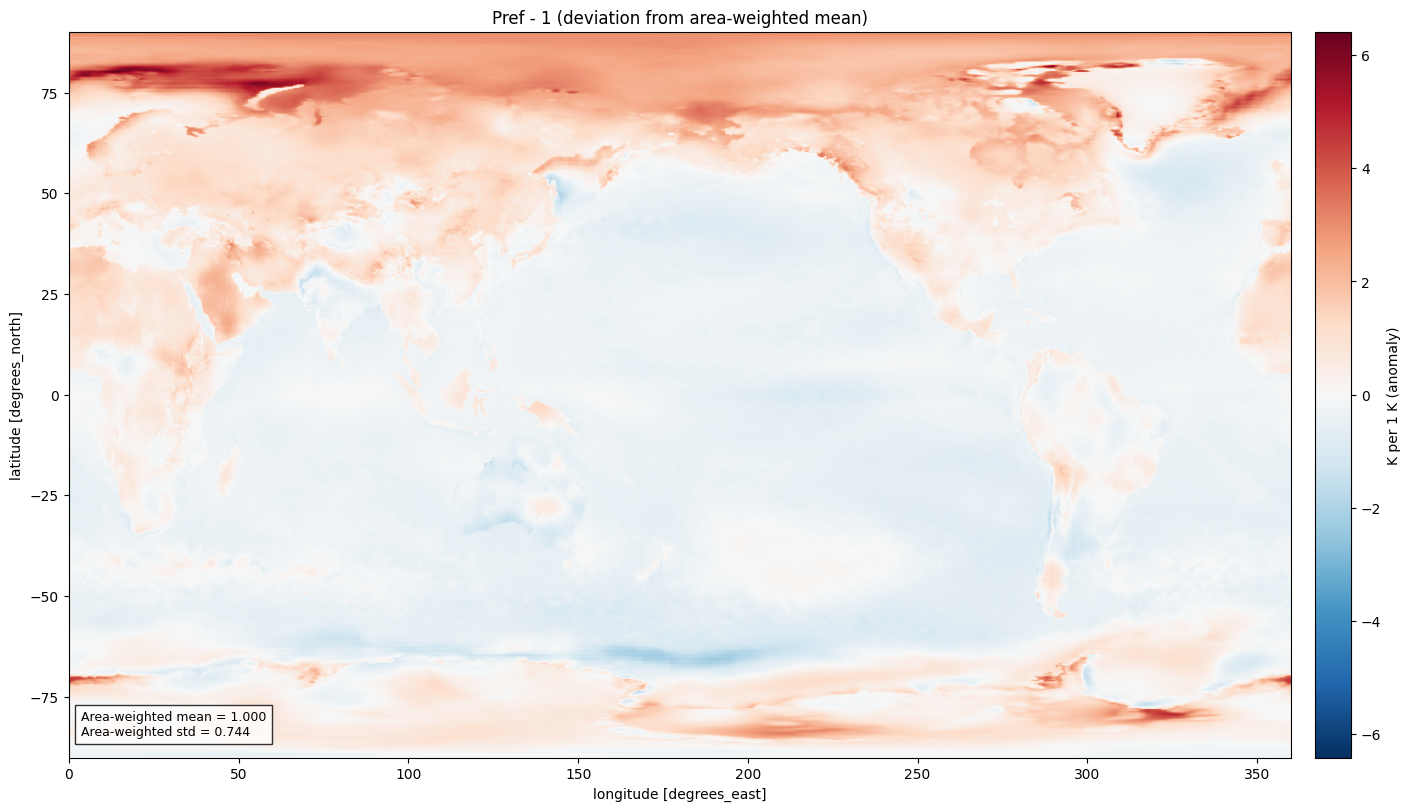

In [38]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# --------- inputs (assumed present) ----------
da1 = surface_temp_ERA5_1  # 1950-1980 mean
da2 = surface_temp_ERA5_2  # 1995-2025 mean

# ensure 2D (lat, lon); if there's a time dim, take mean first
# da1 = da1.mean(dim='time') if 'time' in da1.dims else da1
# da2 = da2.mean(dim='time') if 'time' in da2.dims else da2

pattern_raw = da2 - da1  # warming field

# --------- auto-detect lat/lon names ----------
def find_lat_lon_names(da):
    lat_name = None
    lon_name = None
    for c in da.coords:
        cl = c.lower()
        if ('lat' in cl) or ('latitude' in cl):
            lat_name = c
        if ('lon' in cl) or ('longitude' in cl):
            lon_name = c
    if lat_name is None or lon_name is None:
        raise ValueError(f"Could not detect lat/lon coordinate names. Available coords: {list(da.coords)}")
    return lat_name, lon_name

lat_name, lon_name = find_lat_lon_names(pattern_raw)
print("Using lat coord:", lat_name, " lon coord:", lon_name)

lat = pattern_raw[lat_name]

# --------- build weights DataArray (1D lat is fine; xarray will broadcast over lon) ----------
weights_1d = np.cos(np.deg2rad(lat))
weights_da = xr.DataArray(weights_1d, coords={lat_name: lat}, dims=[lat_name])

# Set weights to zero where pattern is NaN so they don't contribute
weights_da_masked = weights_da.where(~np.isnan(pattern_raw), 0.0)

# --------- compute area-weighted global mean ΔT_ref ----------
deltaT_ref = float(pattern_raw.weighted(weights_da_masked).mean(dim=(lat_name, lon_name)).values)
print(f"Area-weighted global mean change (ΔT_ref): {deltaT_ref:.6f} K")

# guard against tiny/zero deltaT_ref
if not np.isfinite(deltaT_ref) or abs(deltaT_ref) < 1e-12:
    raise ValueError("Computed ΔT_ref is not finite or essentially zero; cannot normalize.")

# --------- normalized pattern (K per 1K) ----------
Pref = pattern_raw / deltaT_ref
Pref.name = 'Pref (K per 1 K)'

# verify area-weighted mean ~ 1
mean_pref = float(Pref.weighted(weights_da_masked).mean(dim=(lat_name, lon_name)).values)
print(f"Area-weighted mean of Pref (should be ~1): {mean_pref:.6f}")

# --------- compute weighted std for annotation ----------
pref_var = float(((Pref - mean_pref)**2).where(~np.isnan(Pref)).weighted(weights_da_masked).mean(dim=(lat_name, lon_name)).values)
pref_std = np.sqrt(pref_var)
print(f"Area-weighted std of Pref: {pref_std:.6f}")

# --------- prepare anomaly-from-1 for plotting ----------
Pref_anom = Pref - 1.0
absmax = np.nanmax(np.abs(Pref_anom.values))
if not np.isfinite(absmax) or absmax == 0:
    absmax = 0.01

# --------- plotting (two panels) ----------
fig, axes = plt.subplots(1,figsize=(14,8), constrained_layout=True)

ax = axes
im1 = Pref_anom.plot.pcolormesh(ax=ax, cmap='RdBu_r', vmin=-absmax, vmax=absmax, add_colorbar=False, rasterized=True)
ax.set_title('Pref - 1 (deviation from area-weighted mean)')
cbar1 = fig.colorbar(im1, ax=ax, orientation='vertical', pad=0.02)
cbar1.set_label('K per 1 K (anomaly)')

# annotate stats on the right plot
axes.text(0.01, 0.03, f'Area-weighted mean = {mean_pref:.3f}\nArea-weighted std = {pref_std:.3f}',
             transform=axes.transAxes, bbox=dict(facecolor='white', alpha=0.8), fontsize=9)

#plt.suptitle('ERA5 Normalized Warming Pattern (1950–1980 → 1995–2025)', y=1.02)
plt.show()

In [ ]:
# Compare with the one based on climate model data. How do the warming patterns differ?

## References
* Santer, B. D., Wigley, T. M., Schlesinger, M. E., & Mitchell, J. F. (1990). Developing climate scenarios from equilibrium GCM results.
* Mitchell, T. D. (2003). Pattern scaling: an examination of the accuracy of the technique for describing future climates. Climatic change, 60(3), 217-242.
* Tebaldi, C., & Arblaster, J. M. (2014). Pattern scaling: Its strengths and limitations, and an update on the latest model simulations. Climatic Change, 122, 459-471.
* IPCC, 2021: Summary for Policymakers. In: Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. In Press.